In [1]:
# Desativando os avisos sobre as bibliotecas depreciadas:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Importando os módulos:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [5]:
# Importando os modelos:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb

C:\Users\amaur\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile, chi2

In [7]:
def loadData(filepath):
    chunks = []
    for chunk in pd.read_csv(filepath, low_memory=False, chunksize=1000):
        chunks.append(chunk)
    return chunks

In [8]:
df_business = pd.concat(loadData('C:/Users/amaur/Documents/yelp_business.csv'))

In [9]:
#df_business_att = pd.concat(loadData('C:/Users/amaur_5j86jzh/Desktop/TCC - Yelp/Datasets/yelp_business_attributes.csv'))

In [10]:
df_checkin = pd.concat(loadData('C:/Users/amaur/Documents/yelp_checkin.csv'))

In [11]:
df_review = pd.concat(loadData('C:/Users/amaur/Documents/yelp_review.csv'))

In [12]:
df_business_cols = ['business_id', 'name', 'latitude', 'longitude', 'city', 'state', 'stars', 'review_count', 'is_open']
df_checkin_cols = ['business_id', 'checkins']
df_review_cols = ['business_id', 'stars']

In [13]:
new_df_business = df_business.loc[:, df_business_cols]
new_df_checkin = df_checkin.loc[:, df_checkin_cols]
new_df_review = df_review.loc[:, df_review_cols]

In [14]:
new_df_review.loc[new_df_review["stars"] > 3.5, 'positive_reviews'] = 1
new_df_review.loc[new_df_review["stars"] < 2.5, 'negative_reviews'] = 1
new_df_review.loc[(new_df_review['stars'] >= 2.5) & (new_df_review['stars'] <= 3.5), 'neutral_reviews'] = 1

In [15]:
df_review_group = new_df_review.groupby(by='business_id')

grouped_df_review = pd.DataFrame()
grouped_df_review['positive_reviews'] = df_review_group['positive_reviews'].count()
grouped_df_review['negative_reviews'] = df_review_group['negative_reviews'].count()
grouped_df_review['neutral_reviews'] = df_review_group['neutral_reviews'].count()
grouped_df_review['total_reviews'] = df_review_group['positive_reviews'].count() + df_review_group['negative_reviews'].count() + df_review_group['neutral_reviews'].count()

In [16]:
df_checkin_group = new_df_checkin.groupby(by='business_id')

grouped_df_checkin = pd.DataFrame()
grouped_df_checkin['total_checkins'] = df_checkin_group['checkins'].sum()

In [17]:
grouped_df_review.reset_index(inplace=True)
grouped_df_checkin.reset_index(inplace=True)

df = pd.merge(left=grouped_df_review, right=grouped_df_checkin, on='business_id', how='left')
df = pd.merge(left=new_df_business, right=df, on='business_id', how='left')
#df = pd.merge(left=df, right=df_business_att,on='business_id',how='left')
df

,business_id,name,latitude,longitude,city,state,stars,review_count,is_open,positive_reviews,negative_reviews,neutral_reviews,total_reviews,total_checkins
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",33.330690,-111.978599,Ahwatukee,AZ,4.0,22,1,17,5,1,23,1.0
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",40.291685,-80.104900,McMurray,PA,3.0,11,1,5,6,0,11,1.0
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",33.524903,-112.115310,Phoenix,AZ,1.5,18,1,2,14,2,18,1.0
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",33.383147,-111.964725,Tempe,AZ,3.0,9,0,4,5,0,9,1.0
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",41.119535,-81.475690,Cuyahoga Falls,OH,3.5,116,1,64,29,23,116,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174562,ALV5R8NkZ1KGOZeuZl3u0A,"""Whitby Toyota""",43.873460,-78.968033,Whitby,ON,4.0,4,1,3,1,0,4,1.0
174563,gRGalHVu6BcaUDIAGVW_xQ,"""Village Auto Body""",41.243385,-81.636212,Richfield,OH,5.0,3,1,3,0,0,3,NaN
174564,XXvZBIHoJBU5d6-a-oyMWQ,"""AAM""",33.407914,-111.965098,Tempe,AZ,1.5,19,1,3,16,0,19,1.0
174565,lNpPGgM96nPIYM1shxciHg,"""Bronze Beauty Spray Tanning""",40.517724,-80.091466,Pittsburgh,PA,5.0,14,1,14,0,0,14,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174567 entries, 0 to 174566
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   business_id       174567 non-null  object 
 1   name              174567 non-null  object 
 2   latitude          174566 non-null  float64
 3   longitude         174566 non-null  float64
 4   city              174566 non-null  object 
 5   state             174566 non-null  object 
 6   stars             174567 non-null  float64
 7   review_count      174567 non-null  int64  
 8   is_open           174567 non-null  int64  
 9   positive_reviews  174567 non-null  int64  
 10  negative_reviews  174567 non-null  int64  
 11  neutral_reviews   174567 non-null  int64  
 12  total_reviews     174567 non-null  int64  
 13  total_checkins    146350 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 20.0+ MB


In [19]:
#business_cats=';'.join(df['categories'])
#cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
#cats_ser = cats.category.value_counts()

#cats_df = pd.DataFrame(cats_ser)
#cats_df.reset_index(inplace=True)

#cats_df

In [20]:
df.describe()

,latitude,longitude,stars,review_count,is_open,positive_reviews,negative_reviews,neutral_reviews,total_reviews,total_checkins
count,174566.000000,174566.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,146350.000000
mean,38.627312,-92.679009,3.632196,30.137059,0.840376,19.915923,6.699571,3.525758,30.141252,1.754554
std,5.389012,26.240079,1.003739,98.208174,0.366258,68.896946,22.322883,14.964082,98.216705,4.707560
min,-36.086009,-142.466650,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,33.631550,-112.125879,3.000000,4.000000,1.000000,3.000000,1.000000,0.000000,4.000000,1.000000
50%,36.144257,-89.410128,3.500000,8.000000,1.000000,5.000000,2.000000,1.000000,8.000000,1.000000
75%,43.606181,-79.657609,4.500000,23.000000,1.000000,14.000000,6.000000,2.000000,23.000000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000,5856.000000,1703.000000,1152.000000,7362.000000,861.000000


In [21]:
def checkNullQuantity(df):
    return df.isnull().sum()

checkNullQuantity(df)

business_id             0
name                    0
latitude                1
longitude               1
city                    1
state                   1
stars                   0
review_count            0
is_open                 0
positive_reviews        0
negative_reviews        0
neutral_reviews         0
total_reviews           0
total_checkins      28217
dtype: int64

In [22]:
df.loc[df['city'].isnull(), 'city'] = 'Edinburgh'

In [23]:
df.loc[df['state'].isnull(), 'city'] = 'Henderson'
df.loc[df['state'].isnull(), 'state'] = 'NV'

In [24]:
df.loc[df['longitude'].isnull(), 'longitude'] = -79.65156555
df.loc[df['latitude'].isnull(), 'latitude'] = 43.78596696

In [25]:
df['total_checkins'] = df['total_checkins'].fillna(0)

In [26]:
checkNullQuantity(df)

business_id         0
name                0
latitude            0
longitude           0
city                0
state               0
stars               0
review_count        0
is_open             0
positive_reviews    0
negative_reviews    0
neutral_reviews     0
total_reviews       0
total_checkins      0
dtype: int64

In [27]:
df.describe()

,latitude,longitude,stars,review_count,is_open,positive_reviews,negative_reviews,neutral_reviews,total_reviews,total_checkins
count,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000,174567.000000
mean,38.627342,-92.678934,3.632196,30.137059,0.840376,19.915923,6.699571,3.525758,30.141252,1.470948
std,5.389011,26.240022,1.003739,98.208174,0.366258,68.896946,22.322883,14.964082,98.216705,4.358458
min,-36.086009,-142.466650,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,33.631550,-112.125877,3.000000,4.000000,1.000000,3.000000,1.000000,0.000000,4.000000,1.000000
50%,36.144262,-89.410122,3.500000,8.000000,1.000000,5.000000,2.000000,1.000000,8.000000,1.000000
75%,43.606209,-79.657592,4.500000,23.000000,1.000000,14.000000,6.000000,2.000000,23.000000,1.000000
max,89.999314,115.086769,5.000000,7361.000000,1.000000,5856.000000,1703.000000,1152.000000,7362.000000,861.000000


In [28]:
#Verificar outliers

def plot_boxplot(nrows, ncols, index, df, column):
    plt.subplot(nrows, ncols, index)
    fig = sns.boxplot(x=column, data=df, orient='v')
    fig.set_title('BoxPlot: {}'.format(column))
    fig.set_ylabel('Values')
    
def plot_distribution(nrows, ncols, index, df, column):
    plt.subplot(nrows, ncols, index)
    fig = sns.distplot(df[column], hist=False, kde_kws={'bw':0.1})
    #fig = df[column].hist(bins=25)
    fig.set_title('Distribution: {}'.format(column))
    fig.set_ylabel('Values')

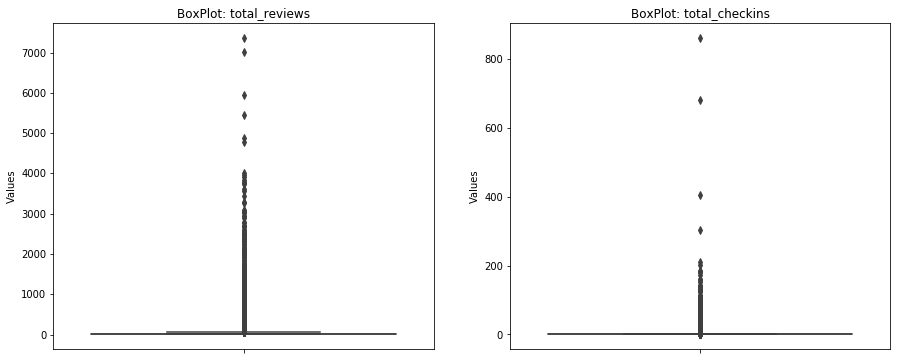

In [29]:
plt.figure(figsize=(15, 6))

plot_boxplot(1, 2, 1, df, 'total_reviews')
plot_boxplot(1, 2, 2, df, 'total_checkins')

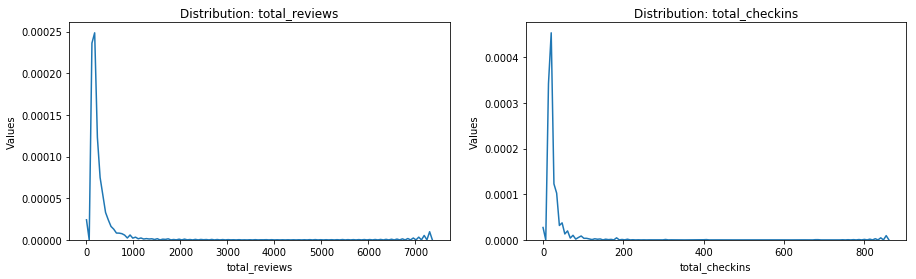

In [30]:
plt.figure(figsize=(15, 4))

plot_distribution(1, 2, 1, df, 'total_reviews')
plot_distribution(1, 2, 2, df, 'total_checkins')

In [31]:
df['positive_reviews'] = df['positive_reviews'] / df['total_reviews']
df['negative_reviews'] = df['negative_reviews'] / df['total_reviews']
df['neutral_reviews'] = df['neutral_reviews'] / df['total_reviews']

In [32]:
df.loc[df['total_checkins'] == 0, 'number_checkins'] = 'None'
df.loc[(df['total_checkins'] > 0) & (df['total_checkins'] <= 5), 'number_checkins'] = 'Normal'
df.loc[df['total_checkins'] > 5, 'number_checkins'] = 'High'

In [33]:
#def get_outliers_limits(df, column):
#    q1 = df[column].quantile(q=0.25)
#    q3 = df[column].quantile(q=0.75)
#    amp = q3 - q1
#    lim_max = q3 + 3 * amp
#    lim_min = q1 - 3 * amp
#    return [lim_min, lim_max]

#def get_outliers(df, column, lim_min, lim_max):
#    return df[(df[column] > lim_max) | (df[column] < lim_min)]

#def show_counted_outliers(df, column, lim_min, lim_max):
#    print('{}: {}'.format(column, get_outliers(df, column, lim_min, lim_max)[column].count()))

In [34]:
#review_count_limits = get_outliers_limits(df, 'review_count')
#total_checkins_limits = get_outliers_limits(df, 'total_checkins')

#print('review_count: {}'.format(review_count_limits))
#print('total_checkins: {}'.format(total_checkins_limits))

In [35]:
#show_counted_outliers(df, 'review_count', review_count_limits[0], review_count_limits[1])
#show_counted_outliers(df, 'total_checkins', total_checkins_limits[0], total_checkins_limits[1])

In [36]:
#total_checkins_new_limit = df['total_checkins'].mean() + 3 * df['total_checkins'].std()

#show_counted_outliers(df, 'total_checkins', 0, total_checkins_new_limit)

In [37]:
#df.loc[df['review_count'] > review_count_limits[1], 'review_count'] = review_count_limits[1]
#df.loc[df['total_checkins'] > total_checkins_new_limit, 'total_checkins'] = total_checkins_new_limit

In [38]:
# Dados raros
by_state = df.groupby('state')
other_states = by_state['business_id'].count()
other_states = other_states.loc[other_states <= 10].index

by_city = df.groupby('city')
other_cities = by_city['business_id'].count()
other_cities = other_cities.loc[other_cities <= 10].index

In [39]:
for item in other_states:
    df.loc[df['state'] == item, 'state'] = 'Other'

for item in other_cities:
    df.loc[df['city'] == item, 'city'] = 'Other'

In [40]:
df.head(10)

,business_id,name,latitude,longitude,city,state,stars,review_count,is_open,positive_reviews,negative_reviews,neutral_reviews,total_reviews,total_checkins,number_checkins
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",33.330690,-111.978599,Ahwatukee,AZ,4.0,22,1,0.739130,0.217391,0.043478,23,1.0,Normal
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",40.291685,-80.104900,McMurray,PA,3.0,11,1,0.454545,0.545455,0.000000,11,1.0,Normal
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",33.524903,-112.115310,Phoenix,AZ,1.5,18,1,0.111111,0.777778,0.111111,18,1.0,Normal
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",33.383147,-111.964725,Tempe,AZ,3.0,9,0,0.444444,0.555556,0.000000,9,1.0,Normal
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",41.119535,-81.475690,Cuyahoga Falls,OH,3.5,116,1,0.551724,0.250000,0.198276,116,1.0,Normal
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",48.727200,9.147950,Stuttgart,BW,4.0,5,1,0.800000,0.200000,0.000000,5,1.0,Normal
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",36.207430,-115.268460,Las Vegas,NV,4.0,5,1,0.800000,0.200000,0.000000,5,0.0,None
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",36.197484,-115.249660,Las Vegas,NV,1.5,9,1,0.111111,0.888889,0.000000,9,1.0,Normal
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",40.615102,-80.091349,Wexford,PA,5.0,15,1,0.933333,0.000000,0.066667,15,1.0,Normal
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",36.055825,-115.046350,Henderson,NV,5.0,7,1,1.000000,0.000000,0.000000,7,1.0,Normal


In [41]:
#state_ordinal = {j: i for i, j in enumerate(df['state'].unique(), 0)}
#df['state'] = df['state'].map(state_ordinal)

In [42]:
#city_ordinal = {k: i for i, k in enumerate(df['city'].unique(), 0)}
#df['city'] = df['city'].map(city_ordinal)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

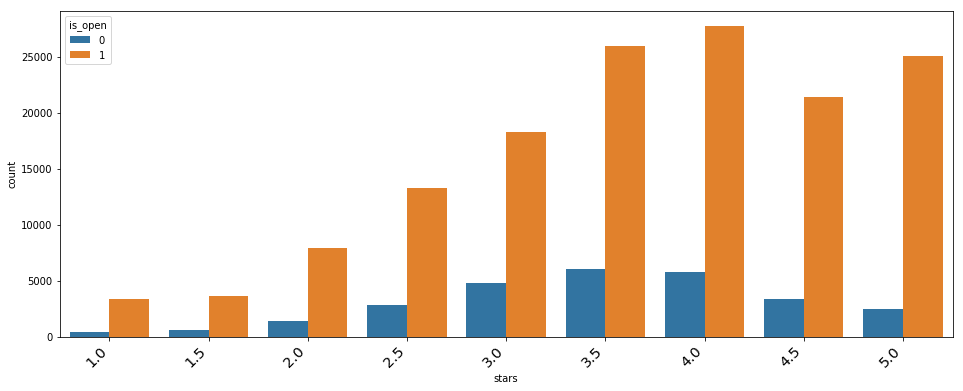

In [43]:
# Stars
plt.figure(figsize=(16, 6))
sns.countplot('stars', hue='is_open', data=df)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)

In [44]:
df['is_open'].value_counts()

1    146702
0     27865
Name: is_open, dtype: int64

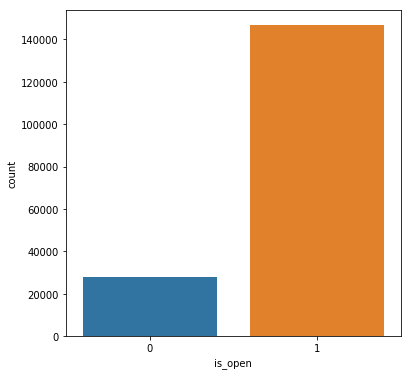

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(x='is_open', data=df);

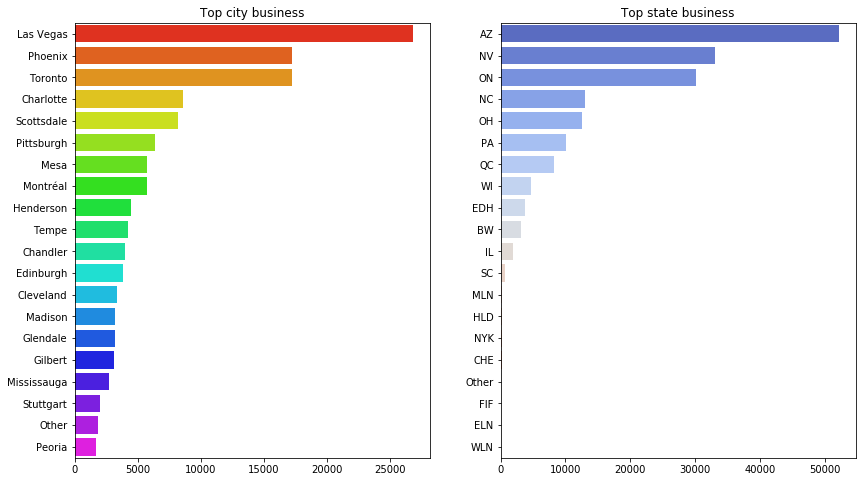

In [46]:
# States and cities
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()

cnt = df['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax=ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business')

cnt = df['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax=ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business');

In [47]:
print(len(df['state'].value_counts()), len(df['city'].value_counts()))

24 333


In [48]:
# States que mais fecharam

In [49]:
#df_cols = ['latitude', 'longitude', 'review_count', 'positive_reviews', 'negative_reviews', 'neutral_reviews', 'starsMean', 'TotalCheckins', 'city', 'state']

#X = df[df_cols]
#y = df['is_open']

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [51]:
#lr = LogisticRegression()

#lr.fit(X_train, y_train)

#lr

In [52]:
#y_pred = lr.predict(X_test)
#y_pred

In [53]:
#accuracy_score(y_test, y_pred)

In [54]:
#print(classification_report(y_test, y_pred))

In [55]:
#print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

In [56]:
#modelo_v1 = sm.Logit(df['is_open'], df[['latitude', 'longitude', 'review_count', 'positive_reviews', 'negative_reviews', 'neutral_reviews', 'stars', 'TotalCheckins']]);
modelo_v1 = sm.Logit(df['is_open'], df[['positive_reviews', 'negative_reviews', 'neutral_reviews', 'stars']]);
modelo_v2 = modelo_v1.fit(method='bfgs')

modelo_v2.pvalues

         Current function value: 0.428753
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


C:\Users\amaur\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


positive_reviews     7.884650e-43
negative_reviews    5.213010e-151
neutral_reviews     1.253691e-174
stars               4.357985e-174
dtype: float64

In [57]:
df_check_chi2 = df.copy()

state_ordinal = {j: i for i, j in enumerate(df_check_chi2['state'].unique(), 0)}
df_check_chi2['state'] = df_check_chi2['state'].map(state_ordinal)

#city_ordinal = {j: i for i, j in enumerate(df_check_chi2['city'].unique(), 0)}
#df_check_chi2['city'] = df_check_chi2['city'].map(city_ordinal)

number_checkins_ordinal = {j: i for i, j in enumerate(df_check_chi2['number_checkins'].unique(), 0)}
df_check_chi2['number_checkins'] = df_check_chi2['number_checkins'].map(number_checkins_ordinal)

In [58]:
#valor_p = chi2(df[['state', 'city']], df['is_open'])
#valor_p = chi2([state_dummies, city_dummies], df['is_open'])
#valor_p = chi2([number_checkins_dummies, state_dummies], y)

valor_p = chi2(df_check_chi2[['state', 'number_checkins']], df_check_chi2['is_open'])
valor_p[1]

array([1.17577665e-12, 1.38614455e-57])

In [59]:
# Dummies
number_checkins_dummies = pd.get_dummies(df['number_checkins'], prefix='number_checkins')
state_dummies = pd.get_dummies(df['state'], prefix='state')
#city_dummies = pd.get_dummies(df['city'], prefix='city')

In [60]:
y = df['is_open']

#df_cols = ['latitude', 'longitude', 'review_count', 'positive_reviews', 'negative_reviews', 'neutral_reviews', 'stars', 'TotalCheckins']
#df = df[df_cols]

#X = pd.concat([df, state_dummies, city_dummies], axis=1)

df_cols = ['positive_reviews', 'negative_reviews', 'neutral_reviews', 'stars']
df = df[df_cols]

X = pd.concat([df, number_checkins_dummies, state_dummies], axis=1)
#X = pd.concat([df, number_checkins_dummies, city_dummies], axis=1)

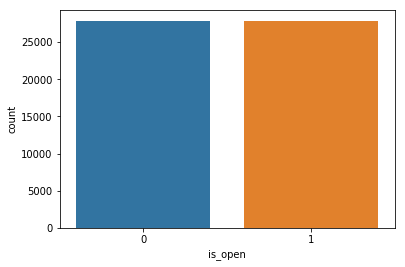

In [61]:
#Aplicando NearMiss
nr = NearMiss()

X, y = nr.fit_sample(X, y)
ax = sns.countplot(x=y)

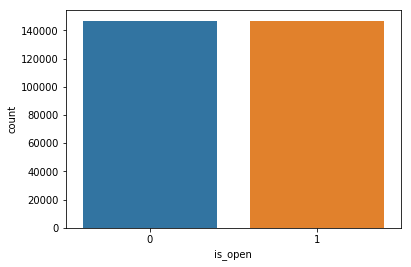

In [70]:
#Aplicando o SMOTE
smt = SMOTE()

X, y = smt.fit_sample(X, y)
ax = sns.countplot(x=y)

In [141]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.98574931, -0.70256308, -0.09636115, ..., -0.06274614,
        -0.45501345, -1.14651912],
       [ 0.25017961,  0.48931793, -0.22655639, ..., -0.06274614,
        -0.33343899, -0.83072998],
       [ 0.87546958,  0.51985363, -0.03126352, ..., -0.06274614,
        -0.23212694,  0.43242656],
       ...,
       [-0.93667037, -0.70423974, -0.22655639, ..., -0.06274614,
         0.01102198, -1.14651912],
       [ 0.47955517,  0.43470697, -0.22655639, ..., -0.63675175,
         0.31495813, -0.51494085],
       [-0.65870842,  0.46358956, -0.22655639, ..., -0.63675175,
        -0.25238935,  0.74821569]])

In [62]:
num_folds = 10
num_instances = len(X)
seed = 7

In [66]:
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('ADA', AdaBoostClassifier()))
modelos.append(('GBM', GradientBoostingClassifier()))
modelos.append(('RF', RandomForestClassifier()))
modelos.append(('XGB', xgb.XGBClassifier()))
modelos.append(('SVM', SVC()))

In [ ]:
#avaliando cada modelo

resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed, shuffle = True)
    cv_res_accuracy = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'accuracy')
    cv_res_precision = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'precision')
    cv_res_recall = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'recall')
    cv_res_f1 = model_selection.cross_val_score(modelo, X, y, cv = kfold, scoring = 'f1')
    #resultados.append(cv_results)
    resultados.extend([cv_res_accuracy, cv_res_precision, cv_res_recall, cv_res_f1])
    nomes.append(nome)
    msg = "%s: %f - %f - %f - %f" % (nome, cv_res_accuracy.mean(), cv_res_precision.mean(), cv_res_recall.mean(), cv_res_f1.mean())
    print(msg)

C:\Users\amaur\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amaur\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [ ]:
mi = mutual_info_classif(X, y)
mi

In [ ]:
mi = pd.Series(mi)
mi.index = X.columns
mi = mi.sort_values(ascending=False)
mi.plot.bar(figsize=(12,8))
plt.title('Mutual Information')

In [46]:
#mi = mutual_info_classif(X_scaled, y)
#mi

In [47]:
#mi = pd.Series(mi)
#mi.index = X.columns
#mi = mi.sort_values(ascending=False)
#mi.plot.bar(figsize=(12,8))
#plt.title('Mutual Information com escala')